In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pickle

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    print("not here")
    sys.path.append(path)

import neurolib.dashboard.data as data
from neurolib.models.aln import ALNModel
import neurolib.dashboard.layout as layout
import neurolib.dashboard.functions as functions
from neurolib.utils import costFunctions as costFunc

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
readpath = '..' + os.sep

with open(readpath + os.sep + 'bi.pickle','rb') as file:
    load_array= pickle.load(file)
ext_exc = load_array[0]
ext_inh = load_array[1]

grid_resolution = layout.grid_resolution

dist_up_regime = np.zeros((len(ext_exc), 2))
dist_down_regime = np.zeros((len(ext_exc)))

cmap = layout.getcolormap()
darkgrey, midgrey, lightgrey, color_bi_updown, color_LC, color_bi_uposc = layout.getcolors()
exc_red = cmap(3)
inh_blue=cmap(0)
green = cmap(2)

aln = ALNModel()
data.set_parameters(aln)
state_vars = aln.state_vars

In [3]:
##############################################################
def setinit(init_vars_, model):
    state_vars = model.state_vars
    init_vars = model.init_vars
    for iv in range(len(init_vars)):
        for sv in range(len(state_vars)):
            if state_vars[sv] in init_vars[iv]:
                #print("set init vars ", )
                if model.params[init_vars[iv]].ndim == 2:
                    model.params[init_vars[iv]][0,:] = init_vars_[sv]
                else:
                    model.params[init_vars[iv]][0] = init_vars_[sv]

def readcase(case_):
    
    global exc_, inh_, no_c_, both_c_
    global exc_1, inh_1, lenx_1, leny_1, exc_2, inh_2, lenx_2, leny_2
    global exc_3, inh_3, lenx_3, leny_3, exc_4, inh_4, lenx_4, leny_4, cost1, cost2, cost3, cost4
    global d_x, d_y, cost_p_x, cost_p_y, cost_s_x, cost_e_x, cost_s_y, cost_e_y
    global d_xy_sum, d_xy, dx3, dy3, cost_xy, cost_xy_sum, costx3, costy3, len3_sum, len3sqrt
    
    readpath = '..' + os.sep
    
    data_array = data.read_data(aln, readpath, case_)
    exc_, inh_, both_c_, no_c_ = data_array[0:4]
    exc_1, inh_1, lenx_1, leny_1, exc_2, inh_2, lenx_2, leny_2 = data_array[4:12]
    exc_3, inh_3, lenx_3, leny_3, exc_4, inh_4, lenx_4, leny_4, cost1, cost2, cost3, cost4 = data_array[12:]

    control_data = data.read_control(readpath, case_)
    opt_control = control_data[2]
    opt_cost = control_data[3]
        
    d_x = []
    d_y = []
    d_xy_sum = []
    d_xy = []
    dx3 = []
    dy3 = []
    len3_sum = []
    len3sqrt = []
    
    if case_ in ['1', '3']:
        for i in range(len(exc_1)):
            d_x.append(data.dist_right(exc_1[i], inh_1[i], ext_exc, ext_inh, grid_resolution))
        for i in range(len(exc_2)):
            d_y.append(data.dist_low(exc_2[i], inh_2[i], ext_exc, ext_inh, grid_resolution))
        for i in range(len(exc_3)):
            dx3.append(data.dist_right(exc_3[i], inh_3[i], ext_exc, ext_inh, grid_resolution))
            dy3.append(data.dist_low(exc_3[i], inh_3[i], ext_exc, ext_inh, grid_resolution))
            d_xy_sum.append(dx3[-1] + dy3[-1])
            len3_sum.append( np.abs(lenx_3[i]) + np.abs(leny_3[i]) )
            d_xy.append( np.sqrt( dx3[-1]**2 + dy3[-1]**2 ) )
            len3sqrt.append( np.sqrt( lenx_3[i]**2 + leny_3[i]**2  ))
    else:
        for i in range(len(exc_1)):
            d_x.append(data.dist_left(exc_1[i], inh_1[i], ext_exc, ext_inh, grid_resolution))
        for i in range(len(exc_2)):
            d_y.append(data.dist_up(exc_2[i], inh_2[i], ext_exc, ext_inh, grid_resolution))
        for i in range(len(exc_3)):
            dx3.append(data.dist_left(exc_3[i], inh_3[i], ext_exc, ext_inh, grid_resolution))
            dy3.append(data.dist_up(exc_3[i], inh_3[i], ext_exc, ext_inh, grid_resolution))
            d_xy_sum.append(dx3[-1] + dy3[-1])
            len3_sum.append( np.abs(lenx_3[i]) + np.abs(leny_3[i]) )
            d_xy.append( np.sqrt( dx3[-1]**2 + dy3[-1]**2 ) )
            len3sqrt.append( np.sqrt( lenx_3[i]**2 + leny_3[i]**2  ))
        
    cost_p_x = []
    cost_p_y = []
    cost_s_x = []
    cost_e_x = []
    cost_s_y = []
    cost_e_y = []
    
    cost_xy = []
    costx3 = []
    costy3 = []
    cost_xy_sum = []
    

    for i in range(len(d_x)):
        cost_p_x.append(cost1[i][0][0][0])
        cost_s_x.append(cost1[i][2][0][0])
        cost_e_x.append(cost1[i][1][0][0])
    for i in range(len(d_y)):
        cost_p_y.append(cost2[i][0][0][1])
        cost_s_y.append(cost2[i][2][0][1])
        cost_e_y.append(cost2[i][1][0][1])
    for i in range(len(dx3)):
        costx3.append(cost3[i][1][0][0])
        costy3.append(cost3[i][1][0][1])
        cost_xy_sum.append( costx3[-1] + costy3[-1] )
        cost_xy.append( np.sqrt( costx3[-1]**2 + costy3[-1]**2 ) )

In [4]:
amp_range_e = np.arange(0., 11., 2.)
start_range_e = np.arange(0., 30., 5.)
dur_range_e = np.arange(0., 70., 10.)
amp_range_i = np.arange(0., 11., 2.)
start_range_i = np.arange(0., 30., 5.)
dur_range_i = np.arange(0., 70., 10.)

In [23]:
file_ = 'DC_current.pickle'
DC_control = [[None, None], [None, None], [None, None], [None, None]]
DC_cost = [[None, None], [None, None], [None, None], [None, None]]

if os.path.isfile(file_):
    print("file exists")
    with open(file, 'rb') as f:
        print('open')
        DC_control = pickle.load(f)

file exists
open


EOFError: Ran out of input

In [60]:
# FIG 2, 3

data.set_parameters(aln)
dur = 400.
trans_time = 0.95

ind0 = [20, 50]

best_guess = [6.0, 0.0, 39.0, 0.0, 0.0, 0.0]

# task1 a [0.0, 0.0, 0.0, 6.0, 0.0, 29.0]
# task1 b [7.5, 0.0, 42.0, 0.0, 0.0, 0.0]
# task2 a [3.0, 0.0, 42.0, 4.5, 5.0, 22.0]
# task2 b [6.0, 0.0, 35.0, 3.5, 3.0, 19.0]

# task3 a [6.0, 0.0, 39.0, 0.0, 0.0, 0.0]
# task3 b [7.5, 0.0, 39.0, 0.0, 0.0, 0.0]
# task4 a [6.0, 0.0, 39.0, 0.0, 0.0, 0.0]
# task4 b [7.5, 0.0, 39.0, 0.0, 0.0, 0.0]


if best_guess[0] == 0.:
    amp_range_e = [0.]
    start_range_e = [0.]
    dur_range_e = [0.]
else:
    amp_range_e = np.arange(max(best_guess[0]-2., 0.), best_guess[0]+2.5, 0.5)
    start_range_e = np.arange(max(best_guess[1]-2., 0.), best_guess[1]+2.5, 1.)
    dur_range_e = np.arange(max(best_guess[2]-2., 0.), best_guess[2]+2.5, 1.)
if best_guess[3] == 0.:
    amp_range_i = [0.]
    start_range_i = [0.]
    dur_range_i = [0.]
else:
    amp_range_i = np.arange(max(best_guess[3], 0.), best_guess[3]+0.5, 0.5)
    start_range_i = np.arange(max(best_guess[4], 0.), best_guess[4]+0.5, 1.)
    dur_range_i = np.arange(max(best_guess[5], 0.), best_guess[5]+0.5, 1.)

weights = [1., 0., 1.]

cases_ = ['1', '2', '3', '4']
readpath = '..' + os.sep

#DC_control = [[None]*2] * len(cases_)
#DC_control[0][0] = [None] * len(cases_)

data.set_parameters(aln)

In [61]:
for c_ in range(len(cases_)):
    task = 'task' + cases_[c_]
    print(task)
            
    if c_ in [1, 3]:
        weights = [1., 1., 0.]
    else:
        weights = [1., 0., 1.]

    optcost = np.zeros(len(ind0))
    dist_ = np.zeros(len(ind0))
    dist_i = np.zeros(len(ind0))

    for i in range(len(ind0)):

        if [c_, i] != [2, 0]:
            continue
        
        mincost = 1000.
        
        print('point ', c_, i)
        
        
        #DC_control[2][0] = None
    
        # evaluated task 2 incl., task 3 not yet
        # 8 0 40 0 0 0 
        # 8 0 40 0 0 0
        # 7 0 45 0 0 0
        # 8 0 40 0 0 0
        # 6 0 40 0 0 0 
        # 8 0 35 0 0 0
        # 6 0 40 0 0 0 
        # 8 0 35 0 0 0
        
        #if type(DC_control[c_][i]) != type(None):
        #    print('DC solution exists, continue')
        #    continue
            
        print(i, ext_exc[ind0[i]], ext_inh[ind0[i]])

        if c_ in [0,1]:
            dist_ = data.dist_right(ext_exc[ind0[i]], ext_inh[ind0[i]], ext_exc, ext_inh, grid_resolution)
            dist_i = - data.dist_low(ext_exc[ind0[i]], ext_inh[ind0[i]], ext_exc, ext_inh, grid_resolution)
        
        else:
            dist_ = - data.dist_left(ext_exc[ind0[i]], ext_inh[ind0[i]], ext_exc, ext_inh, grid_resolution)
            dist_i = data.dist_up(ext_exc[ind0[i]], ext_inh[ind0[i]], ext_exc, ext_inh, grid_resolution)

        print(amp_range_e, start_range_e, dur_range_e, amp_range_i, start_range_i, dur_range_i)
        
        for a_e in amp_range_e:
            for start_e in start_range_e:
                for dur_e in dur_range_e:
                    for a_i in amp_range_i:
                        for start_i in start_range_i:
                            for dur_i in dur_range_i:
                    
                                cost_DC, control_DC = data.DC_trace(aln, ext_exc[ind0[i]], ext_inh[ind0[i]], [start_e, start_i], [dur_e, dur_i],
                                                        [a_e * dist_, a_i * dist_i], 400., cases_[c_],
                                                        trans_time, weights)
                                total_cost = ( weights[0] * cost_DC[0][0][0] + weights[1] * sum(cost_DC[1][0][:])
                                            + weights[2] * sum(cost_DC[2][0][:]) )
                                #print(total_cost)
                                if total_cost < mincost:
                                    print("smaller cost for ", a_e, start_e, dur_e, a_i, start_i, dur_i)
                                    minind = [a_e, start_e, dur_e, a_i, start_i, dur_i]
                                    mincost = total_cost
                                    DC_control[c_][i] = control_DC.copy()
                                    DC_cost[c_][i] = mincost
            
        print('minimal cost = ', mincost, ' for indices = ', minind)
        
        with open(file,'wb') as f:
            pickle.dump([DC_control, DC_cost], f)    

task1
task2
task3
point  2 0
0 0.4500000000000001 0.4750000000000002
[4.  4.5 5.  5.5 6.  6.5 7.  7.5 8. ] [0. 1. 2.] [37. 38. 39. 40. 41.] [0.0] [0.0] [0.0]
smaller cost for  6.0 0.0 39.0 0.0 0.0 0.0
minimal cost =  2.341874249399395  for indices =  [6.0, 0.0, 39.0, 0.0, 0.0, 0.0]
task4


task1
-------  0 0.4500000000000001 0.4750000000000002
-------  1 0.47500000000000014 0.6000000000000003
20 0.4500000000000001 0.4750000000000002


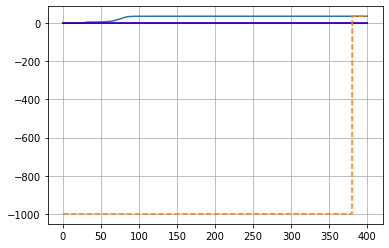

[[3.6349862448158032, None], [None, None], [None, None], [None, None]]


TypeError: an integer is required (got type _io.BufferedWriter)

In [19]:

cases_ = ['1', '2', '3', '4']

initVars = [None] * len(ind0)
target_ = [None] * len(ind0)


for c_ in range(len(cases_)):
    task = 'task' + cases_[c_]
    print(task)
    
    for i in range(len(ind0)):
        
        print("------- ", i, ext_exc[ind0[i]], ext_inh[ind0[i]])
        aln.params.ext_exc_current = ext_exc[ind0[i]] * 5.
        aln.params.ext_inh_current = ext_inh[ind0[i]] * 5.
        aln.params.duration = 3000.
        
        maxI = 3.
        if c_ in [2,3]:
            maxI = -3.
        
        control0 = aln.getZeroControl()
        control0 = functions.step_control(aln, maxI_ = maxI)
        aln.run(control=control0)

        target_rates = np.zeros((2))
        target_rates[0] = aln.rates_exc[0,-1] 
        target_rates[1] = aln.rates_inh[0,-1]

        control0 = functions.step_control(aln, maxI_ = -maxI)
        aln.run(control=control0)

        init_state_vars = np.zeros(( len(state_vars) ))
        for j in range(len(state_vars)):
            if aln.state[state_vars[j]].size == 1:
                init_state_vars[j] = aln.state[state_vars[j]][0]
            else:
                init_state_vars[j] = aln.state[state_vars[j]][0,-1]

        initVars[i] = init_state_vars

        aln.params.duration = 400.

        target_[i] = aln.getZeroTarget()
        target_[i][:,0,:] = target_rates[0]
        target_[i][:,1,:] = target_rates[1]
        target_[i][:,0,:3800] = -1000
        target_[i][:,1,:3800] = -1000


    aln.params.duration = 400.

    if c_ in [0,2]:
        i_p, i_e, i_s = 20., 0., 1.
    else:
        i_p, i_e, i_s = 20., 1., 0.

    for i in range(len(ind0)):
        aln.params.ext_exc_current = ext_exc[ind0[i]] * 5.
        aln.params.ext_inh_current = ext_inh[ind0[i]] * 5.

        print(ind0[i], ext_exc[ind0[i]], ext_inh[ind0[i]])
        setinit(initVars[i], aln)

        aln.run(control=DC_control[c_][i])

        plt.plot(aln.t, aln['rates_exc'][0,:])
        plt.plot(aln.t, DC_control[c_][i][0,0,:], color='red')
        plt.plot(aln.t, DC_control[c_][i][0,1,:], color='blue')
        plt.plot(aln.t, target_[i][0,0,:], linestyle='--')
        plt.show()

        state = np.zeros((1,2,4001))
        state[0,0,:] = aln['rates_exc'][0,:]
        state[0,1,:] = aln['rates_inh'][0,:]
        DC_cost[c_][i] = costFunc.f_int(1, 2, 4001, 0.1, state, target_[i], DC_control[c_][i], i_p, i_e, i_s, v_ = [0])
        print(DC_cost)

        with open(file,'wb') as f:
            pickle.dump(DC_control, DC_cost, f)    